### Import Libraries

In [1]:
# the below code is for displaying the output from all lines of python code within a single cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# A fundamental package for linear algebra and multidimensional arrays
import pandas as pd                  

# Data analysis and data manipulating tool
import numpy as np                   

# Library to generate random numbers
import random                        

# Collection is a Python module that implements specialized container datatypes providing 
# Counter is a dict subclass for counting hashable objects
from collections import Counter      
                                     
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings in the notebook
import warnings
warnings.filterwarnings("ignore")

# to display up to 500 rows in the output of the jupyter notebook cell
pd.set_option('display.max_rows', 500)

### Titanic dataset from Kaggle
This is the legendary Titanic ML competition – the best, first challenge for you to dive into ML. The objective is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.### 

In [2]:
# import training data as pandas dataframe
# the data is in csv - comma separated file. Hence we use the function 'read_csv'
train = pd.read_csv("TitanicTrain_data.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# the below code will print the number of rows and columns
train.shape

(891, 12)

In [4]:
# import test data as pandas dataframe
test = pd.read_csv("TitanicTest_data.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# the below code will print the number of rows and columns
test.shape

# the data has 11 columns and 418 rows in the test set
# one column less because the target variable will not be there in the test set. It is our task to predict the target variable

(418, 11)

In [6]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
# please note the first column displayed is python index (similar to the row numbers in MS Excel)
# the python index always starts from zero (0). If you have to extract the first row, then you use the code below
train.iloc[[0]]

# the python index always starts from zero (0). If you have to extract the 16th row, then you use the code below
train.iloc[[15]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0,NaN,S


In [8]:
# detect columns with missing values in the training dataset

# isnull().sum() will sum the number of missing values by columns
train_count_of_missval_by_col = (train.isnull().sum())
train_count_of_missval_by_col

# below code will display only the columns with missing values (in absolute number of rows)
train_count_of_missval_by_col[train_count_of_missval_by_col > 0]

# below code will display only the columns with missing values (in percentage of missing values to the total rows)
(train_count_of_missval_by_col[train_count_of_missval_by_col > 0]/train.shape[0])*100

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age         177
Cabin       687
Embarked      2
dtype: int64

Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [9]:
# detect columns with missing values in the test data
# isnull().sum() will sum the number of missing values by columns
test_count_of_missval_by_col = (test.isnull().sum())
test_count_of_missval_by_col

# below code will display only the columns with missing values (in absolute number of rows)
test_count_of_missval_by_col[test_count_of_missval_by_col > 0]

# below code will display only the columns with missing values (in percentage of missing values to the total rows)
(test_count_of_missval_by_col[test_count_of_missval_by_col > 0]/test.shape[0])*100

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Age       86
Fare       1
Cabin    327
dtype: int64

Age      20.574163
Fare      0.239234
Cabin    78.229665
dtype: float64

In [10]:
# describe funtion takes all numeric columns and provide descriptive statistics on them
# descriptive statistics include - count of rows, mean, standard deviation, minimum & maximum value, Quartile 25, 50, and 70
# Note: Quartile 50 = median
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# value_counts() reveals the unique number of values in a column along with the frequency - let us look at string columns
# value_counts(normalize = True) will express the frequency proportional to the total number of rows (in percentage)
train['Sex'].value_counts()
train['Sex'].value_counts(normalize=True)*100

male      577
female    314
Name: Sex, dtype: int64

male      64.758698
female    35.241302
Name: Sex, dtype: float64

Sex - 64.76% of the passengers are male and 35.24% are female

In [12]:
train['Embarked'].value_counts()
train['Embarked'].value_counts(normalize=True)*100

S    644
C    168
Q     77
Name: Embarked, dtype: int64

S    72.440945
C    18.897638
Q     8.661417
Name: Embarked, dtype: float64

Embarked - 72.44% of the passengers boarded at S, 18.90% boarded at C, and 8.66% boarded at Q

In [13]:
# look at the target variable and understand the proportion - let us look at target variable
# 0 = did not survive
# 1 = survived
train['Survived'].value_counts()
train['Survived'].value_counts(normalize=True)*100

0    549
1    342
Name: Survived, dtype: int64

0    61.616162
1    38.383838
Name: Survived, dtype: float64

Interpreting the results - 38.38% of the passengers survived and 61.62% of the passengers did not survive

In [14]:
# Drop unnecessary columns - Ticket and Name (may be passenger ID too - if not set it as index)
del train['Name']
del train['Ticket']
del train['PassengerId']

# Code for using the PassengerId column as index
# train = train.set_index('PassengerId')
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [25]:
# Missing value treatment
# missing values - too many missing values - dropping entire column
del train['Cabin']

In [16]:
# missing values in numeric column many not be NaN or blank. It could be zero as well
train[train['Fare'] == 0].shape

# There are only few rows with missing values in Fare - Listwise or dropping entire rows
train = train[train['Fare'] != 0]
# shape of the training data after dropping rows with missing Fare
train.shape

(15, 9)

(876, 9)

In [17]:
# Importing SimpleImputer from sklearn - this will be used to impute data in the cells with missing values
from sklearn.impute import SimpleImputer 

In [18]:
# missing values - numeric - impute with mean in column age
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
mean_imputer = mean_imputer.fit(train[['Age']])
train['Age'] = mean_imputer.transform(train[['Age']]).ravel()

In [19]:
# missing values - categorical - impute with mode (most frequent)
mode_imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
mode_imputer = mode_imputer.fit(train[['Embarked']])
train['Embarked'] = mode_imputer.transform(train[['Embarked']]).ravel()

In [20]:
# alternative method - missing values - categorical - impute with mode (constant)
const_imputer = SimpleImputer(missing_values=np.NaN, strategy='constant', fill_value = 'NA')
const_imputer = const_imputer.fit(train[['Embarked']])
train['Embarked'] = const_imputer.transform(train[['Embarked']]).ravel()

In [26]:
train.to_csv('train_imputed.csv')

In [27]:
train_imputed = pd.read_csv("train_imputed.csv")
train_imputed.head()

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,male,22.0,1,0,7.2500,S
1,1,1,1,female,38.0,1,0,71.2833,C
2,2,1,3,female,26.0,0,0,7.9250,S
3,3,1,1,female,35.0,1,0,53.1000,S
4,4,0,3,male,35.0,0,0,8.0500,S


In [28]:
train_imputed.isnull().sum()

Unnamed: 0    0
Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

So we can see here there are no missing values in data

In [32]:
# Determine outlier using the Standard deviation method for Age column

# calcuate the mean of age
age_mean = train['Age'].mean()
# calculate the standard deviation
age_std = train['Age'].std()
# Lower limit threshold is Mean - 3* SD
ll = age_mean - (3 * age_std)
print(ll)
# Higher limit threshold is Mean + 3* SD
hh = age_mean + (3 * age_std)
print(hh)

# filter the rows where Age is an outlier. i.e. Age less than the ll or greater than hh
# the usage of & between means it is an and condition
# the usage of | between means it is an or condition
filt_outliers_train = train[(train['Age'] < ll) | (train['Age'] > hh)]
filt_outliers_train.head()

-9.587399314746076
68.87783778716454


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
96,0,1,male,71.0,0,0,34.6542,C
116,0,3,male,70.5,0,0,7.7500,Q
493,0,1,male,71.0,0,0,49.5042,C
630,1,1,male,80.0,0,0,30.0000,S
672,0,2,male,70.0,0,0,10.5000,S


In [33]:
# Determine outlier using the Standard deviation method for fare column

# calcuate the mean of fare
fare_mean = train['Fare'].mean()
# calculate the standard deviation
fare_std = train['Fare'].std()
# Lower limit threshold is Mean - 3* SD
ll = fare_mean - (3 * fare_std)
print(ll)
# Higher limit threshold is Mean + 3* SD
hh = fare_mean + (3 * fare_std)
print(hh)

# filter the rows where fare is an outlier. i.e. fare less than the ll or greater than hh
# the usage of & between means it is an and condition
# the usage of | between means it is an or condition
filt_outliers_train = train[(train['Fare'] < ll) | (train['Fare'] > hh)]
filt_outliers_train.head()

-117.05482740046514
182.56612717215458


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
27,0,1,male,19.0,3,2,263.0000,S
88,1,1,female,23.0,3,2,263.0000,S
118,0,1,male,24.0,0,1,247.5208,C
258,1,1,female,35.0,0,0,512.3292,C
299,1,1,female,50.0,0,1,247.5208,C


2.5
54.5


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
7,0,3,male,2.00,3,1,21.0750,S
11,1,1,female,58.00,0,0,26.5500,S
15,1,2,female,55.00,0,0,16.0000,S
16,0,3,male,2.00,4,1,29.1250,Q
33,0,2,male,66.00,0,0,10.5000,S
54,0,1,male,65.00,0,1,61.9792,C
78,1,2,male,0.83,0,2,29.0000,S
94,0,3,male,59.00,0,0,7.2500,S
96,0,1,male,71.00,0,0,34.6542,C
116,0,3,male,70.50,0,0,7.7500,Q


66

<AxesSubplot:ylabel='Age'>

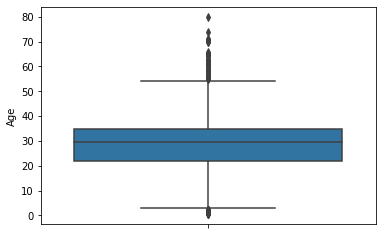

In [35]:
# IQR method for outlier Age
# Calculate Q1, Q2 and IQR
q1 = train['Age'].quantile(0.25)                 
q3 = train['Age'].quantile(0.75)
iqr = q3 - q1
whisker_width = 1.5
ll=q1 - whisker_width*iqr
print(ll)
hh=q3 + whisker_width*iqr
print(hh)
# Apply filter with respect to IQR, including optional whiskers
outlier_age_train = train[(train['Age'] <ll ) | (train['Age'] > hh)]
outlier_age_train
len(outlier_age_train)

# boxplot with 1.5 whiskers
sns.boxplot(y='Age', data = train, whis=1.5)

-27.099999999999998

66.3

(116, 8)

<AxesSubplot:ylabel='Fare'>

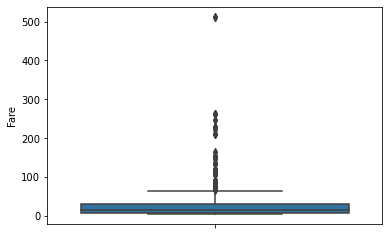

In [37]:
# IQR method for outlier fare
# Calculate Q1, Q2 and IQR
q1 = train['Fare'].quantile(0.25)                 
q3 = train['Fare'].quantile(0.75)
iqr = q3 - q1
whisker_width = 1.5
lower_whisker = q1 - whisker_width*iqr
lower_whisker
upper_whisker = q3 + whisker_width*iqr
upper_whisker
# Apply filter with respect to IQR, including optional whiskers
outlier_fare_train = train[(train['Fare'] < q1 - whisker_width*iqr) | (train['Fare'] > q3 + whisker_width*iqr)]
outlier_fare_train.shape

# boxplot with 1.5 whiskers
sns.boxplot(y='Fare', data = train, whis=1.5)

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

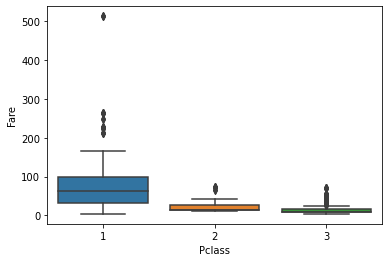

In [38]:
# multivariate outlier - fare and class in comparison
# sometimes the outlier can also occur when you compare one column with another
# in our titanic example - we can check if the fares are directly proportional to the class
# Are the first class people paying high fare and third class people paying low fare? are there any overlap between these fares?

# below code take Pclass in X axis and Fare in Y axis to display the distribution of Fare by Pclass
sns.boxplot(x='Pclass', y='Fare', data = train, whis=1.5)

In [39]:
# Outlier treatment
# Top coding - ceiling the uppper limit of the column with the outer whisker value
train.loc[train.Fare>upper_whisker,'Fare'] = upper_whisker

# Bottom / Zero coding - ceiling the lower limit of the column with lower whisker or zero
# It is called Bottom coding when you ceil the lowest value to lower whisker
# It is called zero coding when you ceil the lowest value to zero
# Zero coding should be used for variables which cannot take neagtive values - example, Age cannot be negative

train.loc[train.Fare<0,'Fare'] = 0

# display of minimum and maximum after outlier treatment
train['Fare'].min()
train['Fare'].max()

4.0125

66.3

In [40]:
# Another method for outlier treatment is Binning
# Group the values into certain bins -> e.g Age 0 to 10 in a bin called '0 - 10', etc

# Equal width binning -> width = (max value — min value) / N
age_range = train.Age.max() - train.Age.min()
min_value = int(np.floor(train.Age.min()))
max_value = int(np.ceil(train.Age.max()))
 
# let's round the bin width
# N = number of bins (which is 10 in the below code)
# change the value 10 in the below code to see how the grouping differs
inter_value = int(np.round(age_range/10))
 
min_value, max_value, inter_value

(0, 80, 8)

[0, 8, 16, 24, 32, 40, 48, 56, 64, 72, 80]
['Bin_1', 'Bin_2', 'Bin_3', 'Bin_4', 'Bin_5', 'Bin_6', 'Bin_7', 'Bin_8', 'Bin_9', 'Bin_10']


<AxesSubplot:xlabel='age_labels', ylabel='count'>

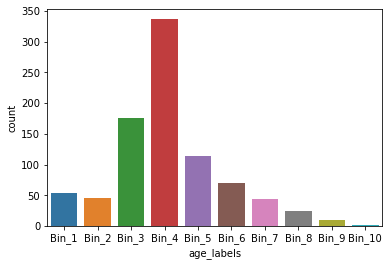

In [41]:
# calculate the intervals
intervals = [i for i in range(min_value, max_value+inter_value, inter_value)]
labels = ['Bin_'+str(i) for i in range(1,len(intervals))]
print(intervals)
print(labels)

train['age_labels'] = pd.cut(x = train.Age, bins=intervals, labels=labels, include_lowest=True)
train['age_interval'] = pd.cut(x = train.Age, bins=intervals, include_lowest=True)

# display the bins in graph along with frequency of occurence 
sns.countplot(train.age_labels)